# Machine Learning libraries in Python

* [node2vec](https://snap.stanford.edu/node2vec/)
* [DeepWalk](https://github.com/phanein/deepwalk)
* [PyG (PyTorch Geometric)](https://www.pyg.org/)
* [Deep Graph Library (DGL)](https://www.dgl.ai/)
* [Stanford Network Analysis Platform (SNAP)](https://github.com/snap-stanford/snap)
* [Graph Nets](https://github.com/deepmind/graph_nets)
* [Spektral](https://graphneural.network/)
* [Jraph](https://github.com/deepmind/jraph)
* [Pointer Networks PyTorch](https://github.com/jojonki/Pointer-Networks)
* [TensorFlow-Pointer-Networks](https://github.com/ikostrikov/TensorFlow-Pointer-Networks)
* [OpenAI Gym](https://github.com/openai/gym)
* [TF-Agents](https://www.tensorflow.org/agents)
* [Keras-RL](https://github.com/keras-rl/keras-rl)
* [pyqlearning](https://github.com/accel-brain/accel-brain-code/tree/master/Reinforcement-Learning)
* [Flow](https://flow-project.github.io/)
* [Sumolib](https://sumo.dlr.de/docs/Tools/Sumolib.html)
* [SMARTS](https://github.com/huawei-noah/SMARTS)

# node2vec Example

In [ ]:
#!pip install node2vec

In [1]:
# import the required libraries 
import networkx as nx
from node2vec import Node2Vec

# Create a sample graph
G = nx.karate_club_graph()

# Create an instance of the Node2Vec class
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Learn the representations
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get the representations of all nodes
representations_all = model.wv.vectors

# Get the representations of a specific node
representations_specific = model.wv['1']

# Print the representations of a specific node
print(representations_specific)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

[-0.07758456 -0.19393197  0.00421953  0.00637109  0.15805113 -0.13039461
  0.0688638   0.11900404 -0.11831087 -0.07632376  0.13316661  0.04489825
 -0.00658828  0.17606622 -0.0341465  -0.04428513 -0.18035102  0.16798535
  0.15096873  0.2921805   0.24778378  0.02851055  0.13218161 -0.14460409
 -0.02192466  0.1395615  -0.15889375 -0.07958866  0.00691597 -0.1607045
  0.15490142 -0.1744809  -0.1109513  -0.14687082  0.15711391  0.40118513
 -0.11259218  0.11005168  0.24955794  0.10621015  0.20712067  0.01955327
 -0.0231651  -0.03364595 -0.05298125 -0.03713074  0.05665582 -0.25704643
 -0.0133299   0.02576125  0.00424858  0.19280128  0.3187501   0.08076082
  0.1817343   0.10310291 -0.02810007 -0.13068631  0.14446662 -0.21067096
  0.24312015 -0.16979969 -0.22982198  0.19386145]


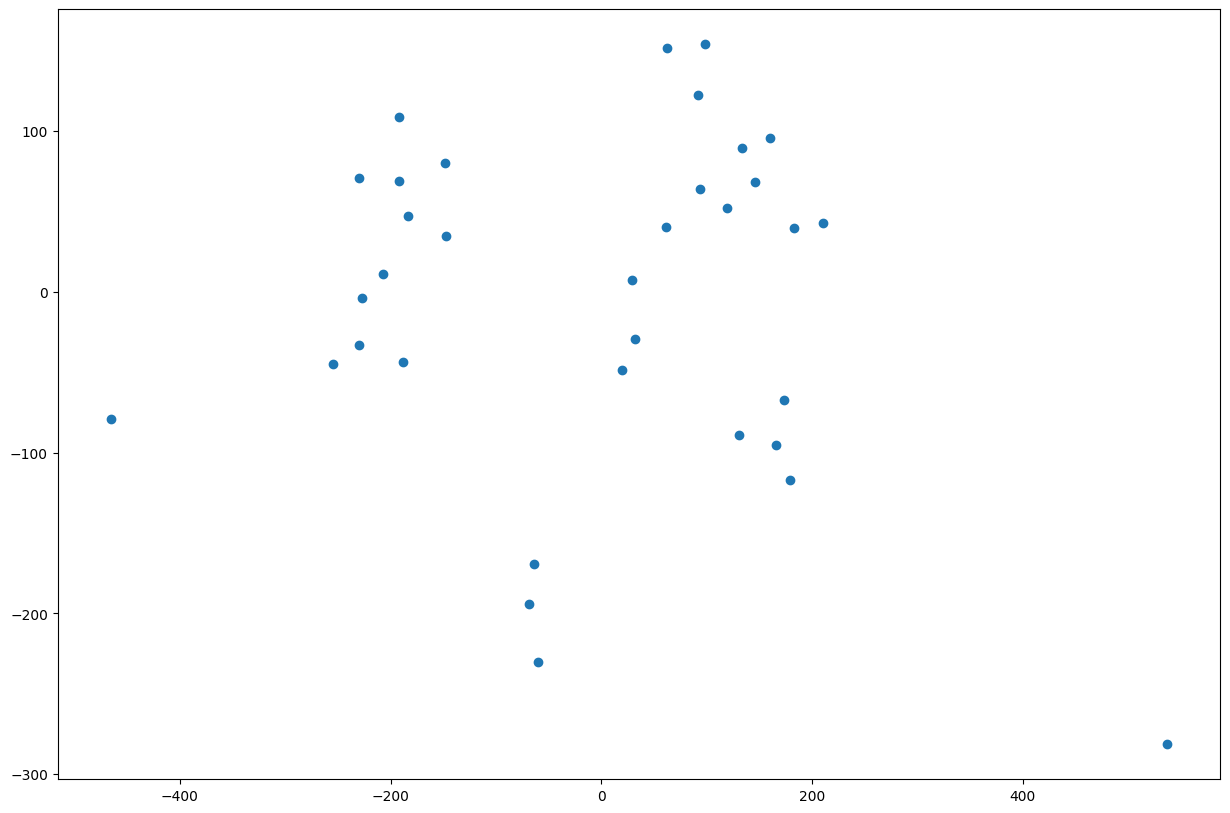

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
reduced_representations = tsne.fit_transform(representations_all)

# Plot the nodes
plt.figure(figsize=(15, 10))
plt.scatter(reduced_representations[:, 0], reduced_representations[:, 1])
plt.show()
# plt.savefig('A1_F05_node2vec.png', format='png', dpi=300)

In [5]:
# save represenattion as csv file
import csv

# Write the representations to a CSV file
with open('representations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["node", "x", "y"])
    for i, vec in enumerate(representations_all):
        writer.writerow([i] + vec.tolist())       

C:\Users\Alaa\.conda\envs\ox\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


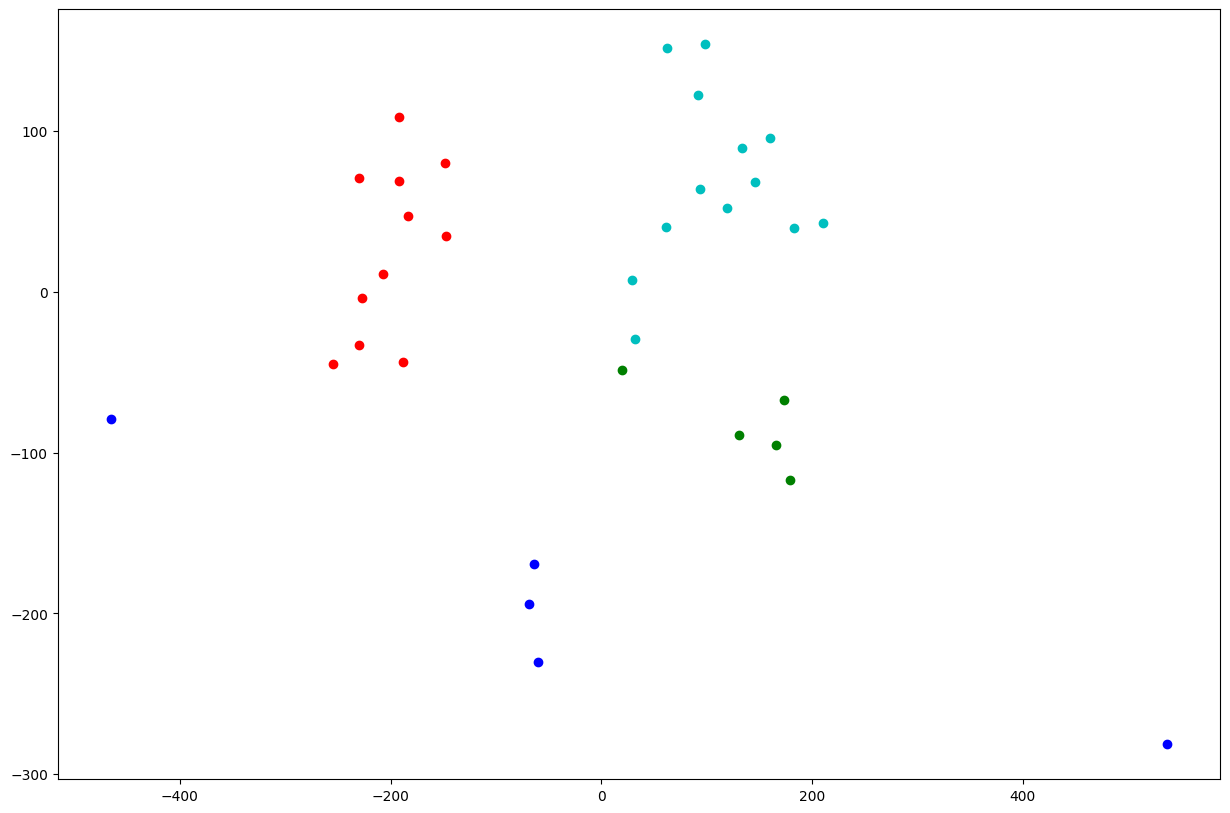

In [6]:
# cluster the generated representation
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(representations_all)

# Plot the nodes
plt.figure(figsize=(15, 10))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(4):
    plt.scatter(reduced_representations[clusters == i, 0], reduced_representations[clusters == i, 1], c=colors[i])
plt.show()

# DeepWalk Example

karateclub packageis an unsupervised machine learning extension library for NetworkX. It provides implementation for DeepWalk.

In [3]:
# !pip install karateclub

In [1]:
from karateclub import DeepWalk, Node2Vec
import networkx as nx
from sklearn.decomposition import PCA
G=nx.karate_club_graph()
print(G.nodes)

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


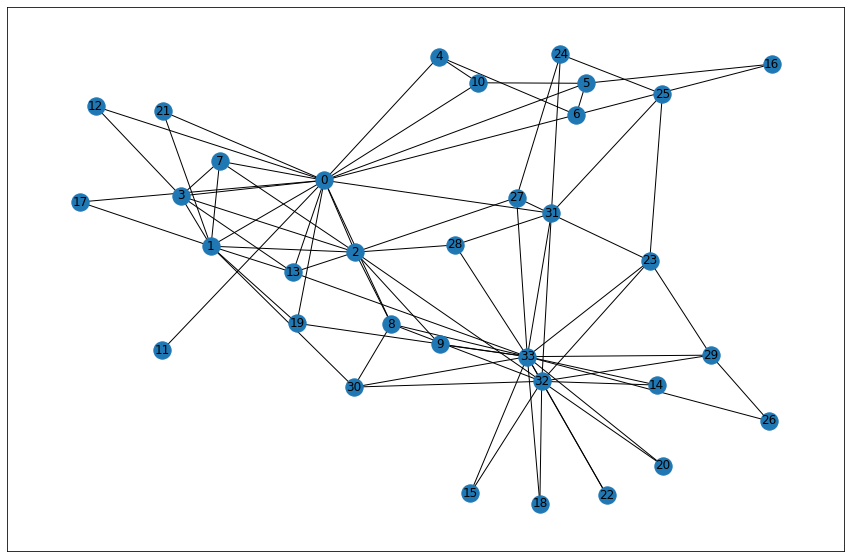

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
nx.draw_networkx(G)
plt.show()

In [3]:
#define DeepWalk mode and fit the graph
model=DeepWalk(dimensions=128, walk_length=100)
model.fit(G)

In [4]:
# Graph embedding
# The KarateClub has 34 memebers and each member is converted to a vector of size 128
embedding=model.get_embedding()
print('Embedding shape:', embedding.shape)


Embedding shape: (34, 128)


In [5]:
# In KarateClub data, member represented by each node belongs can be 'Mr. Hi' or 'Officer'
officer=[] #list to populate with labels
mr=[]
for i in G.nodes:
  t=G.nodes[i]['club']
  officer.append(True if t=='Officer' else False)
  mr.append(False if t=='Officer' else True)

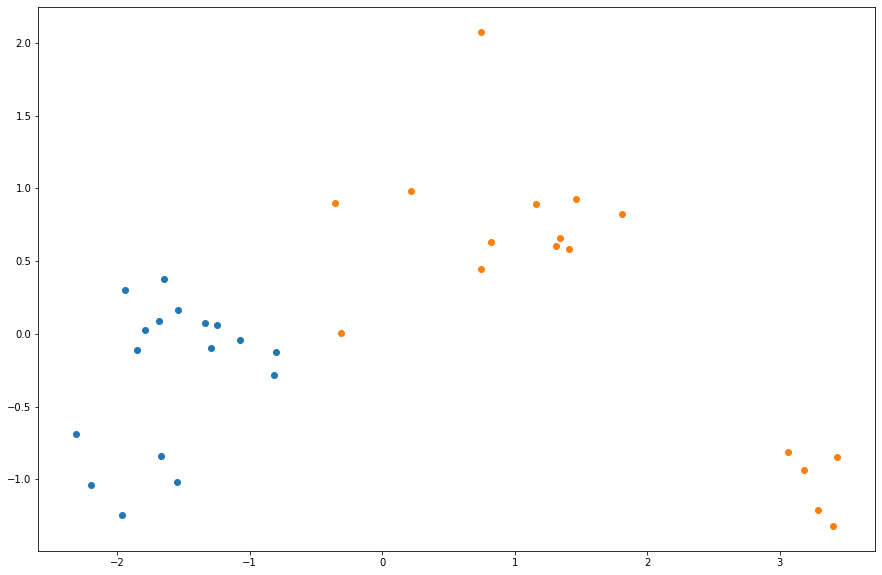

In [6]:
nodes=list(range(len(G)))
X=embedding[nodes]

# dimensionality reducation using Principal Component Analysis (PCA)
pca=PCA(n_components=2)
pca_out=pca.fit_transform(X)

plt.figure(figsize=(15, 10))
plt.scatter(pca_out[:,0][officer],pca_out[:,1][officer])
plt.scatter(pca_out[:,0][mr],pca_out[:,1][mr])
plt.show()
# plt.savefig("A1_F08_Karate.png", format="png", dpi=300)

# PyG Example

In [1]:
# !pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

In [2]:
import os
import torch
os.environ['TORCH'] = torch.__version__

In [3]:
# Helper function for visualization
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

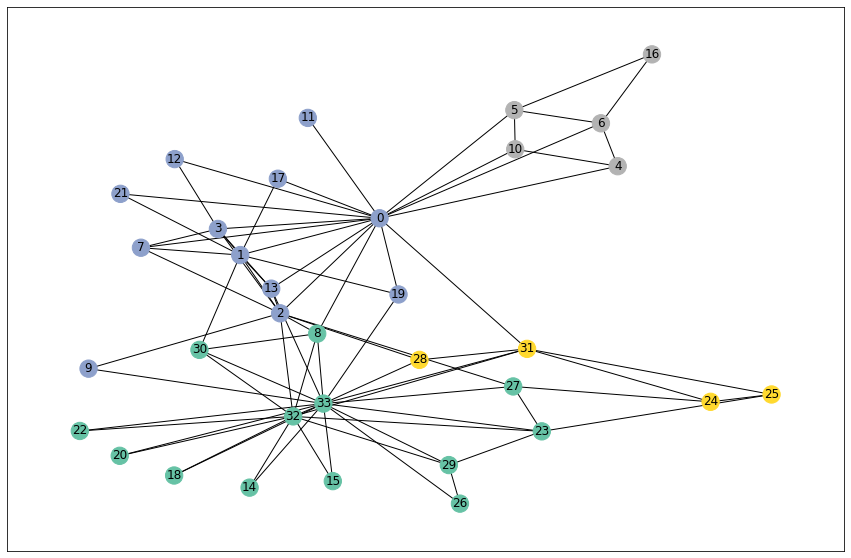

In [4]:
#use karate club dataset
dataset = KarateClub()
data = dataset[0]

#visualization example using pyG
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), node_color=data.y, cmap="Set2")
plt.show()

In [9]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [10]:
#define Graph Convolutional Network (GCN) model
model = GCN()

# Define loss criterion.
criterion = torch.nn.CrossEntropyLoss()  
# Define optimizer and clear gradient
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer.zero_grad()

for epoch in range(401):
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

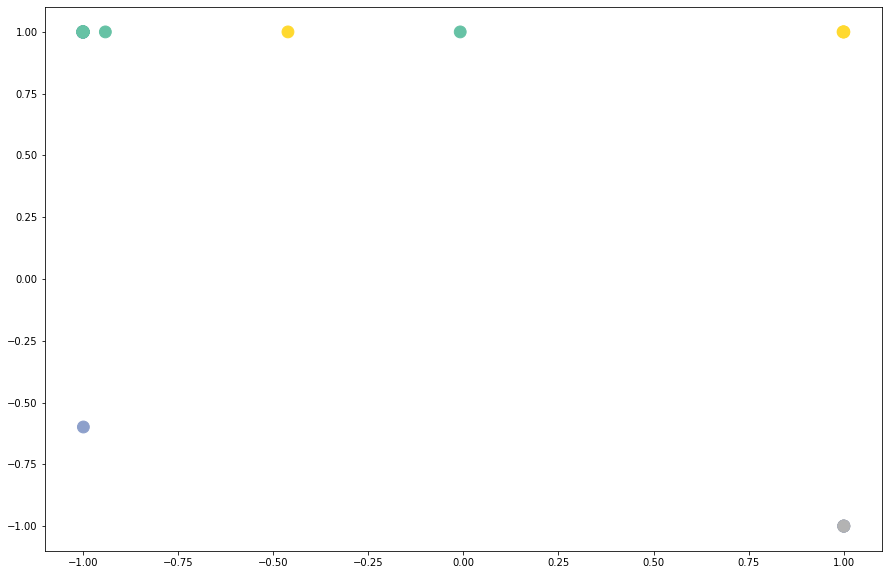

In [11]:
h = h.detach().cpu().numpy() #convert 'h' from tenser format to numpy format for visualize
plt.figure(figsize=(15, 10))
plt.scatter(h[:, 0], h[:, 1], s=140, c=data.y, cmap="Set2")

# Deep Graph Library (DGL) Example

In [13]:
# pip install dgl -f https://data.dgl.ai/wheels/repo.html

In [14]:
import dgl
import torch
import numpy as np

#edge 0->1,1->2,2->3,3->0,
g1 = dgl.graph(([0, 1, 2 , 3], [1, 2, 3, 0]))
print(g1.num_nodes)
#edge 0->1,1->2
g2 = dgl.graph(([0, 1], [1, 2]))

bg = dgl.batch([g1, g2])

#add reverse edges to make a graph undirected
undir_g1 = dgl.add_reverse_edges(g1)

print("g1 edges: ", g1.edges(),"undirected g1 edges", undir_g1.edges())

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
<bound method DGLGraph.num_nodes of Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})>
g1 edges:  (tensor([0, 1, 2, 3]), tensor([1, 2, 3, 0])) undirected g1 edges (tensor([0, 1, 2, 3, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 0, 1, 2, 3]))


In [15]:
#creating a graph with different node types and edge types
g = dgl.heterograph({
    ('NodeA','EdgeB','NodeC'):([0,0,1,1],[1,2,3,4]),
    ('NodeD','EdgeE','NodeF'):([2,4],[3,5])
})
print("node types: ", g.ntypes)
print("edge types: ", g.etypes)
print("node with type A", g.nodes('NodeA'))

#merge all node and edge types
hg = dgl.to_homogeneous(g)
print(hg.ntypes)
print(hg.etypes)

node types:  ['NodeA', 'NodeC', 'NodeD', 'NodeF']
edge types:  ['EdgeB', 'EdgeE']
node with type A tensor([0, 1])
['_N']
['_E']


The following code is a example of using DGL to create a KarateClub graph. The edge list is provided by DGL library: https://docs.dgl.ai/en/0.2.x/tutorials/basics/1_first.html, and we can add features and labels mannually if we need these information to use later

In [16]:
import torch
def build_karate_club_graph():
    g = dgl.DGLGraph()
    # add 34 nodes into the graph; nodes are labeled from 0~33
    g.add_nodes(34)
    # all 78 edges as a list of tuples
    edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
        (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
        (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
        (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
        (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
        (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
        (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
        (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
        (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
        (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
        (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
        (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
        (33, 31), (33, 32)]
    # add edges two lists of nodes: src and dst
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    # edges are directional in DGL; make them bi-directional
    g.add_edges(dst, src)

    return g

graph = build_karate_club_graph()
graph.ndata['feat'] = torch.eye(34)
graph.ndata['label'] = torch.tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])
graph.ndata['mask'] = torch.tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])
#node_features = graph.ndata['feat']


/usr/local/lib/python3.8/dist-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


In [17]:
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h1 = h.tanh()
        out = F.log_softmax(h1, dim=1)
        return out,h1

In [18]:
model = SAGE(in_feats=34, hid_feats=10, out_feats=4)
# Define optimizer and clear gradient
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
optimizer.zero_grad()
mask = graph.ndata['mask']

node_labels =  torch.tensor([0, 1])

for epoch in range(500):
    model.train()
    # forward propagation by using all nodes
    out,h = model(graph, graph.ndata['feat'])
    # compute loss
    loss = F.nll_loss(out[mask], graph.ndata['label'][mask])
    # backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

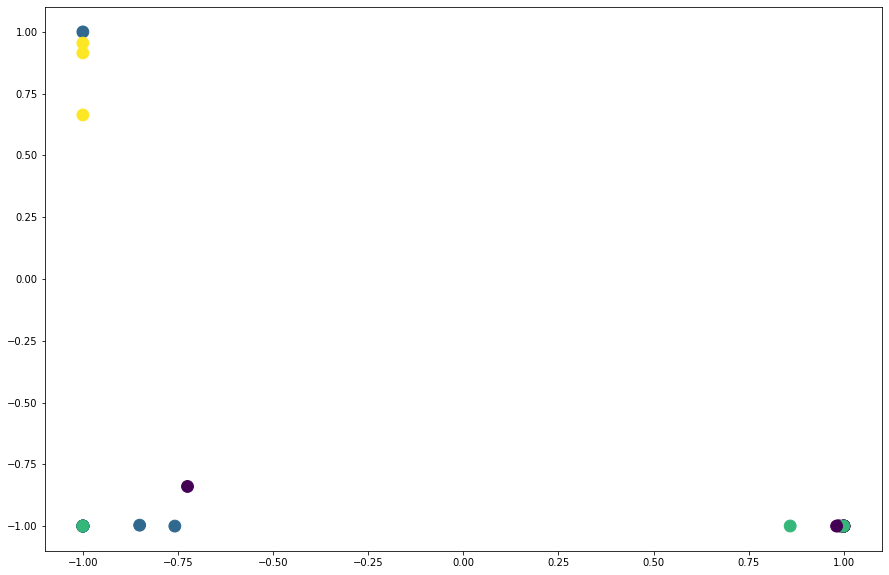

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
h = h.detach().cpu().numpy()
plt.scatter(h[:, 0], h[:, 1], s=140, c=graph.ndata['label'])

# Stanford Network Analysis Platform (SNAP)

In [ ]:
# !python -m pip install snap-stanford

In [ ]:
import snap

#create a graph
G1 = snap.TNGraph.New()

#manually add nodes and edges
G1.AddNode(1)
G1.AddNode(2)
G1.AddNode(3)
G1.AddEdge(1,2)
G1.AddEdge(2,3)

#generate a random graph with 100 nodes and 1000 edges
G2 = snap.GenRndGnm(snap.TNGraph, 100, 1000)

# generate a network using Forest Fire model
G3 = snap.GenForestFire(1000, 0.35, 0.35)

SNAP provides functions for saving and loading graphs

In [ ]:
# save graph as a local file
graph_file = snap.TFOut("test.graph")
G3.Save(graph_file)
graph_file.Flush()

# load graph
FIn = snap.TFIn("test.graph")
G4 = snap.TNGraph.Load(FIn)

# load graph from a text file
snap.SaveEdgeList(G4, "test.txt", "Save as tab-separated list of edges")
G5 = snap.LoadEdgeList(snap.TNGraph, "test.txt", 0, 1)

SNAP use Clauset-Newman-Moore community detection method, you can call CommunityCNM function to detect communities for large networks. The communities that are detected will be returned as a vector.

In [ ]:
#first generate a random graph with 20 nodes and 100 edges
Graph = snap.GenRndGnm(snap.TUNGraph, 20, 100)

#CommunityCNM() returns the modularity and comunity vectors
modularity, communities = Graph.CommunityCNM()
for comunity in communities:
    print("Community: ")
    for i in comunity:
        print(i,end=", ")
    print()
print("The modularity of the network is %f" % modularity)

Community: 
0, 1, 2, 5, 7, 8, 11, 14, 17, 
Community: 
3, 9, 15, 16, 
Community: 
4, 6, 10, 12, 13, 18, 19, 
The modularity of the network is 0.118950


# Spektral Example

In [ ]:
# ! pip install spektral

In [ ]:
import spektral
from spektral.datasets import TUDataset
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from spektral.layers import GCNConv, GlobalSumPool
from spektral.data import BatchLoader

Spektral library offers some datasets with a number of graphs. TUDataset is a very populor dataset that offers a lot of graphs related to biology and chemistry. The following code is short demo about how to use GNN models provided by Spektral to train this dataset.

In [ ]:
print(TUDataset.available_datasets())

['AIDS', 'alchemy_full', 'aspirin', 'benzene', 'BZR', 'BZR_MD', 'COX2', 'COX2_MD', 'DHFR', 'DHFR_MD', 'ER_MD', 'ethanol', 'FRANKENSTEIN', 'malonaldehyde', 'MCF-7', 'MCF-7H', 'MOLT-4', 'MOLT-4H', 'Mutagenicity', 'MUTAG', 'naphthalene', 'NCI1', 'NCI109', 'NCI-H23', 'NCI-H23H', 'OVCAR-8', 'OVCAR-8H', 'P388', 'P388H', 'PC-3', 'PC-3H', 'PTC_FM', 'PTC_FR', 'PTC_MM', 'PTC_MR', 'QM9', 'salicylic_acid', 'SF-295', 'SF-295H', 'SN12C', 'SN12CH', 'SW-620', 'SW-620H', 'toluene', 'Tox21_AhR_training', 'Tox21_AhR_testing', 'Tox21_AhR_evaluation', 'Tox21_AR_training', 'Tox21_AR_testing', 'Tox21_AR_evaluation', 'Tox21_AR-LBD_training', 'Tox21_AR-LBD_testing', 'Tox21_AR-LBD_evaluation', 'Tox21_ARE_training', 'Tox21_ARE_testing', 'Tox21_ARE_evaluation', 'Tox21_aromatase_training', 'Tox21_aromatase_testing', 'Tox21_aromatase_evaluation', 'Tox21_ATAD5_training', 'Tox21_ATAD5_testing', 'Tox21_ATAD5_evaluation', 'Tox21_ER_training', 'Tox21_ER_testing', 'Tox21_ER_evaluation', 'Tox21_ER-LBD_training', 'Tox21_ER

In [ ]:
import numpy as np

dataset = TUDataset('aspirin')
np.random.shuffle(dataset)
dataset_train = dataset[:100]
dataset_test = dataset[100:]

Successfully loaded aspirin.


<ipython-input-3-3aa0cf8819d5>:4: UserWarning: you are shuffling a 'TUDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(dataset)


In [ ]:
class GNN(Model):

    def __init__(self, n_hidden, n_labels):
        super().__init__()
        self.graph_conv = GCNConv(n_hidden)
        self.pool = GlobalSumPool()
        self.dropout = Dropout(0.5)
        self.dense = Dense(n_labels, 'softmax')

    def call(self, inputs):
        out = self.graph_conv(inputs)
        out = self.dropout(out)
        out = self.pool(out)
        out = self.dense(out)

        return out

In [ ]:
#instantiate the model
model = GNN(128, dataset.n_labels)

#compile the model
model.compile('adam', 'categorical_crossentropy')

#create data loader to load dataset
train_loader = BatchLoader(dataset_train, batch_size=32)
test_loader = BatchLoader(dataset_test, batch_size=32)

#train GNN
model.fit(train_loader.load(), steps_per_epoch=train_loader.steps_per_epoch, epochs=10)

/usr/local/lib/python3.8/dist-packages/spektral/data/utils.py:221: UserWarning: you are shuffling a 'TUDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(a)


Epoch 1/10
4/4 [==============================] - 2s 8ms/step - loss: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00


In [ ]:
 #test the model
loss = model.evaluate(test_loader.load(), steps=test_loader.steps_per_epoch)
print('Test loss',loss)

3490/3490 [==============================] - 14s 4ms/step - loss: 0.0000e+00
Test loss 0.0


# OpenAI Gym Example

In [ ]:
#!pip install gym[all]

In [ ]:
import gym
env = gym.make('MountainCar-v0')

OpenAl has developed a lot of environment, the following is the demo of mountain car game.

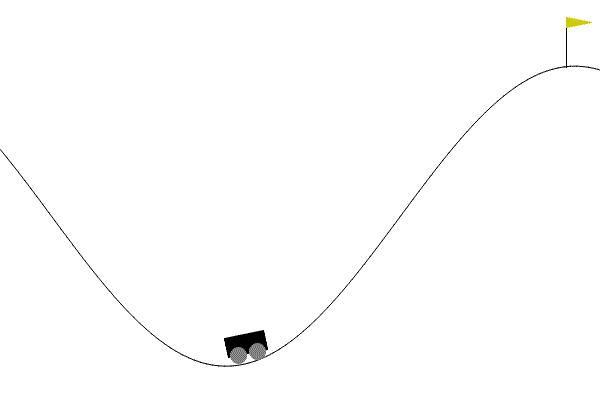

In [ ]:
# Observation and action space 
print("The observation space: {}".format(env.observation_space))
print("The action space: {}".format(env.action_space))

In [ ]:
#reset the environment to initial state
original_observation = env.reset()#reset() returns the initial observations
print("original observation: ",original_observation)

#get a random action from the action space
#in this case, the numerical value of an action can be either 0,1, or 2
random_action = env.action_space.sample()

#take the action
observations, rewards, dones, infos = env.step(random_action)
print("current observations:{},\trewards:{}".format(observations,rewards))

In [ ]:
# Create video device for google colab
# Suppress pygame's attempt to use a real display device by telling SDL to use a dummy driver 
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

In [ ]:
import matplotlib.pyplot as plt
#plot the current game image
state_img = env.render(mode = "rgb_array")
plt.imshow(state_img)

In [ ]:
# Number of steps you run the agent
num_steps = 400
env = gym.make('MountainCar-v0')
_ = env.reset()

for step in range(num_steps):
    # take random action
    action = env.action_space.sample()
    
    # apply the action
    observations, rewards, done, info = env.step(action)
    
    #you can to install dependencies such as pygame or box2d to render the game
    #env.render()
    if step%10==0:
      print("current observations:{},\trewards:{},\tdone:{}\tinfo{}".format(observations,rewards,done,info))

    if done:
        print("current observations:{},\trewards:{},\tdone:{}\tinfo{}".format(observations,rewards,done,info))
        break

# Close the env
env.close()